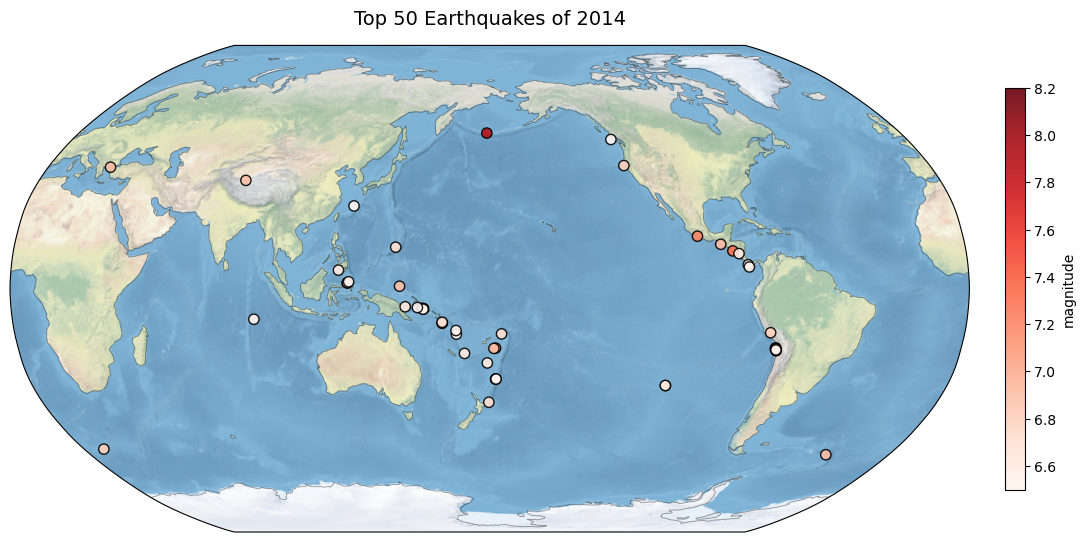

In [6]:
#homework1

import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

try:
    df = pd.read_csv('usgs_earthquakes.csv')
    df = df.dropna(subset=['latitude', 'longitude', 'mag'])
except FileNotFoundError:
    print("未找到文件")
    exit()

top_50 = df.sort_values(by='mag', ascending=False).head(50)


fig = plt.figure(figsize=(12, 7))


ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))


ax.stock_img()

ax.coastlines(resolution='110m', linewidth=0.6, color='black', alpha=0.4)

ax.set_global()


sc = ax.scatter(
    top_50['longitude'], 
    top_50['latitude'], 
    c=top_50['mag'],          
    cmap='Reds',              
    edgecolors='k',           
    linewidth=1,              
    s=55,                     
    alpha=0.9,                
    transform=ccrs.PlateCarree(), 
    zorder=10                 



cbar = plt.colorbar(sc, orientation='vertical', shrink=0.6, pad=0.03, aspect=20)
cbar.set_label('magnitude')

# cbar.set_ticks(np.arange(6.6, 8.3, 0.2)) 

plt.title('Top 50 Earthquakes of 2014', fontsize=14, pad=15)

plt.tight_layout()
plt.show()

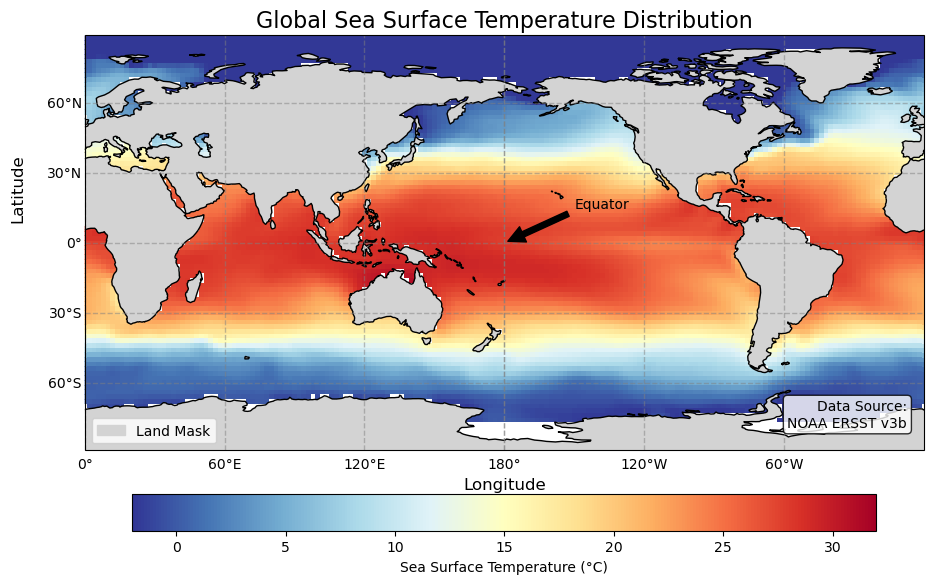

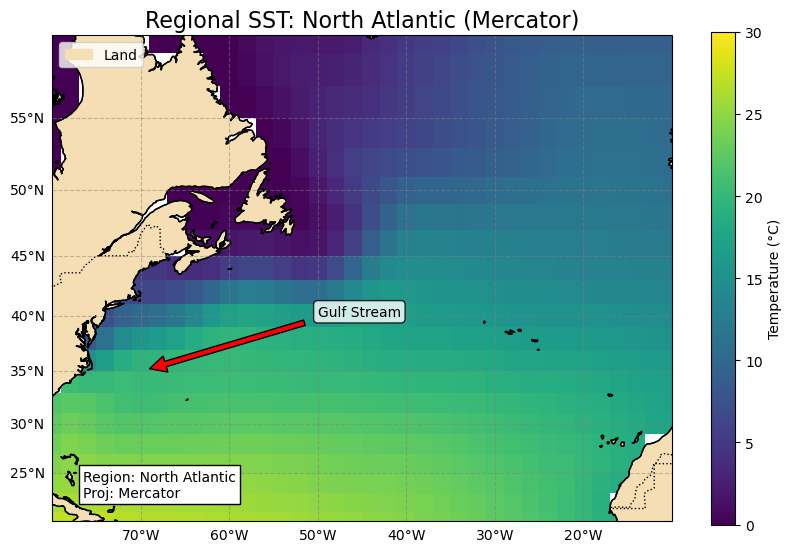

In [1]:
#homework2
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.patches as mpatches


filename = 'NOAA_NCDC_ERSST_v3b_SST.nc'

ds = xr.open_dataset(filename)


sst_data = ds['sst'].isel(time=0)


fig1 = plt.figure(figsize=(12, 7))
proj_global = ccrs.PlateCarree(central_longitude=180)
ax1 = plt.axes(projection=proj_global)


p1 = sst_data.plot(
    ax=ax1, 
    transform=ccrs.PlateCarree(),
    cmap='RdYlBu_r',  
    vmin=-2, vmax=32, 
    add_colorbar=False 
)


ax1.add_feature(cfeature.LAND, facecolor='lightgray', zorder=1)
ax1.coastlines()


gl1 = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                   linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl1.top_labels = False   
gl1.right_labels = False 

ax1.text(-0.08, 0.55, 'Latitude', va='bottom', ha='center',
        rotation='vertical', transform=ax1.transAxes, fontsize=12)
ax1.text(0.5, -0.1, 'Longitude', va='bottom', ha='center',
        transform=ax1.transAxes, fontsize=12)

cbar1 = plt.colorbar(p1, ax=ax1, orientation='horizontal', pad=0.08, shrink=0.8)
cbar1.set_label('Sea Surface Temperature (°C)')


land_patch = mpatches.Patch(color='lightgray', label='Land Mask')
ax1.legend(handles=[land_patch], loc='lower left', frameon=True)


ax1.annotate('Equator', xy=(180, 0), xytext=(210, 15),
             xycoords=ccrs.PlateCarree()._as_mpl_transform(ax1),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=10, color='black')


text_str = "Data Source:\nNOAA ERSST v3b"
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
ax1.text(0.98, 0.05, text_str, transform=ax1.transAxes, fontsize=10,
        verticalalignment='bottom', horizontalalignment='right', bbox=props)


ax1.set_title('Global Sea Surface Temperature Distribution', fontsize=16)

plt.show()



ds_shifted = ds.assign_coords(lon=(((ds.lon + 180) % 360) - 180)).sortby('lon')
sst_data_shifted = ds_shifted['sst'].isel(time=0)


fig2 = plt.figure(figsize=(10, 8))


proj_regional = ccrs.Mercator() 
ax2 = plt.axes(projection=proj_regional)


ax2.set_extent([-80, -10, 20, 60], crs=ccrs.PlateCarree())


p2 = sst_data_shifted.plot(
    ax=ax2, 
    transform=ccrs.PlateCarree(),
    cmap='viridis',
    vmin=0, vmax=30,
    add_colorbar=False
)


ax2.add_feature(cfeature.LAND, facecolor='wheat', edgecolor='black', zorder=1)
ax2.add_feature(cfeature.BORDERS, linestyle=':', zorder=2)
ax2.coastlines(resolution='50m', zorder=2)


gl2 = ax2.gridlines(draw_labels=True, linestyle='--', color='gray', alpha=0.5)
gl2.top_labels = False
gl2.right_labels = False
cbar2 = plt.colorbar(p2, ax=ax2, orientation='vertical', shrink=0.8, pad=0.05)
cbar2.set_label('Temperature (°C)')

land_patch = mpatches.Patch(color='wheat', label='Land')
ax2.legend(handles=[land_patch], loc='upper left')

ax2.annotate('Gulf Stream', xy=(-70, 35), xytext=(-50, 40),
             xycoords=ccrs.PlateCarree()._as_mpl_transform(ax2),
             arrowprops=dict(facecolor='red', shrink=0.05),
             bbox=dict(boxstyle="round", fc="white", alpha=0.8))

ax2.text(0.05, 0.05, "Region: North Atlantic\nProj: Mercator", 
         transform=ax2.transAxes,
         bbox=dict(boxstyle="square,pad=0.3", fc="white", ec="black"))

ax2.set_title('Regional SST: North Atlantic (Mercator)', fontsize=16)

plt.show()